I. Title:Bank Marketing, Url:https://archive.ics.uci.edu/dataset/222/bank+marketing

II. Variable Name,Role,Type,Demographic Description,Units

1. age,Feature,Integer,Age
2. job,Feature,Categorical,Occupation,type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')	
3. marital,Feature,Categorical,Marital Status,marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)	
4. education,Feature,Categorical,Education Level (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	
5. default,Feature,Binary,has credit in default?	
6. balance,Feature,Integer,average yearly balance euros
7. housing,Feature,Binary,has housing loan?	
8. loan,Feature,Binary,has personal loan?	
9. contact,Feature,Categorical,contact communication type (categorical: 'cellular','telephone')
10. day_of_week,Feature,Date,last contact day of the week
11. month,Feature,Date,last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')	
12. duration,Feature,Integer,last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.	
13. campaign,Feature,Integer,number of contacts performed during this campaign and for this client (numeric, includes last contact)	
14. pdays,Feature,Integer,number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
15. previous,Feature,Integer,number of contacts performed before this campaign and for this client	
16. poutcome,Feature,Categorical,outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. y,Target,Binary,has the client subscribed a term deposit?

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
bank_marketing = fetch_ucirepo(id=222) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
print(bank_marketing.metadata) 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
data_fin=X.copy()
data_fin["target"]=y
data_fin.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
data_fin=data_fin.drop(["age","education","pdays","month","day_of_week","campaign","previous","poutcome","duration"],axis=1)

In [5]:
data_fin.shape

(45211, 8)

In [6]:
data_fin.isna().sum()

job          288
marital        0
default        0
balance        0
housing        0
loan           0
contact    13020
target         0
dtype: int64

In [7]:
data_fin=data_fin.drop(["contact"],axis=1)

In [8]:
for i in data_fin.columns:
    print(i,data_fin[i].nunique())

job 11
marital 3
default 2
balance 7168
housing 2
loan 2
target 2


In [9]:
data_fin=data_fin.replace({"yes":1,"no":0})

In [10]:
data_fin["marital"]=data_fin["marital"].map({"single":0,"married":2,"divorced":1})

In [11]:
data_fin["target"].value_counts()

target
0    39922
1     5289
Name: count, dtype: int64

In [12]:
data_fin=data_fin[~data_fin["job"].isna()]

In [13]:
dummies=pd.get_dummies(data_fin["job"]).astype(int)

In [14]:
data_fin=data_fin.drop("job",axis=1)
data_fin=pd.concat([dummies,data_fin],axis=1)

In [15]:
x=data_fin.drop("target",axis=1)
y=data_fin["target"]
model=RandomForestClassifier()
print(y.sum()/len(y))
for i in range(0,2,1):
    a,b,c,d=train_test_split(x,y,stratify=y,test_size=0.2,random_state=i)
    model.fit(a,c)
    probs=model.predict_proba(b)[:,1]
    pred=model.predict(b)
    print(roc_auc_score(d,probs),f1_score(d,pred))
    print(confusion_matrix(d,pred))

0.11697794003071924
0.6658085125213554 0.31237322515212984
[[7321  613]
 [ 743  308]]
0.6612698194932167 0.3084677419354839
[[7307  627]
 [ 745  306]]


In [16]:
# let's do analysis of calling data, not including poutcome as it is the outcome
data_calling=X[["campaign","previous","duration"]]

In [17]:
data_calling["target"]=bank_marketing.data.targets
data_calling["target"]=data_calling["target"].map({"yes":1,"no":0})

In [18]:
x=data_calling.drop("target",axis=1)
y=data_calling["target"]
model=RandomForestClassifier()
print(y.sum()/len(y))
for i in range(0,2,1):
    a,b,c,d=train_test_split(x,y,stratify=y,test_size=0.2,random_state=i)
    model.fit(a,c)
    probs=model.predict_proba(b)[:,1]
    pred=model.predict(b)
    print(roc_auc_score(d,probs),f1_score(d,pred))
    print(confusion_matrix(d,pred))

0.11698480458295547
0.7534245448401007 0.3110348770726129
[[7566  419]
 [ 786  272]]
0.7458091909097043 0.3037249283667622
[[7563  422]
 [ 793  265]]


In [19]:
a,b,c,d=train_test_split(x,y,stratify=y,train_size=0.5,random_state=1)
model.fit(a,c)
probs_test=model.predict_proba(b)[:,1]
pred_test=model.predict(b)
probs_train=model.predict_proba(a)[:,1]
pred_train=model.predict(a)
print(roc_auc_score(c,probs_train),f1_score(c,pred_train))
print(confusion_matrix(c,pred_train))
print(roc_auc_score(d,probs_test),f1_score(d,pred_test))
print(confusion_matrix(d,pred_test))

0.9593475620879778 0.734102738176058
[[19808   153]
 [ 1022  1622]]
0.749285994267271 0.3079701964326033
[[18859  1102]
 [ 1963   682]]


In [20]:
data_calling=data_calling.loc[data_fin.index]
data_calling_fin=pd.concat([data_calling,data_fin],axis=1)

In [21]:
data_calling_fin=data_calling_fin.loc[:, ~data_calling_fin.columns.duplicated()]

In [22]:
x=data_calling_fin.drop("target",axis=1)
y=data_calling_fin["target"]

a,b,c,d=train_test_split(x,y,stratify=y,train_size=0.5,random_state=1)
model.fit(a,c)
probs_test=model.predict_proba(b)[:,1]
pred_test=model.predict(b)
probs_train=model.predict_proba(a)[:,1]
pred_train=model.predict(a)
print(roc_auc_score(c,probs_train),f1_score(c,pred_train))
print(confusion_matrix(c,pred_train))
print(roc_auc_score(d,probs_test),f1_score(d,pred_test))
print(confusion_matrix(d,pred_test))

1.0 1.0
[[19834     0]
 [    0  2627]]
0.8574135261790056 0.3803022915650902
[[19140   694]
 [ 1848   780]]


Analysis Of Error

In [23]:
misclassified_idx=(pred_test!=d)
misclassified_samples=b[misclassified_idx].copy()
misclassified_samples["Actual"]=d[misclassified_idx].values
misclassified_samples["Predicted"]=pred_test[misclassified_idx]
misclassified_samples["Confidence_1"]=probs_test[misclassified_idx]
print("Total Misclassified Samples:", len(misclassified_samples))
misclassified_samples

Total Misclassified Samples: 2542


,campaign,previous,duration,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,...,technician,unemployed,marital,default,balance,housing,loan,Actual,Predicted,Confidence_1
39419,2,0,148,0,0,0,0,0,0,0,...,0,0,0,0,3993,0,0,1,0,0.15
42994,3,0,226,0,0,0,0,0,1,0,...,0,0,2,0,5267,0,0,1,0,0.08
43488,4,2,297,0,0,0,0,1,0,0,...,0,0,2,0,-115,1,0,1,0,0.18
18999,3,0,603,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.09
11427,2,0,653,0,0,0,0,0,0,0,...,0,0,1,0,1381,0,0,0,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31398,2,0,96,0,0,0,0,0,0,0,...,0,0,0,0,4126,0,0,1,0,0.18
26909,3,1,312,0,0,0,1,0,0,0,...,0,0,2,0,460,0,0,0,1,0.59
13891,1,0,313,0,0,0,0,0,0,1,...,0,0,0,0,1186,0,0,0,1,0.74
35533,3,2,787,0,0,0,0,0,0,0,...,0,1,2,0,356,1,0,1,0,0.34


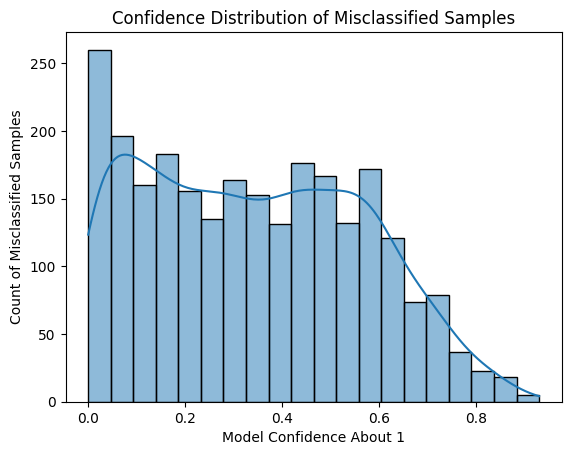

In [24]:
sns.histplot(misclassified_samples["Confidence_1"], bins=20, kde=True)
plt.xlabel("Model Confidence About 1")
plt.ylabel("Count of Misclassified Samples")
plt.title("Confidence Distribution of Misclassified Samples")
plt.show()

In [25]:
importances=model.feature_importances_
feature_names=b.columns
feat_importance_df=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feat_importance_df = feat_importance_df.sort_values(by="Importance",ascending=False)
feat_importance_df

,Feature,Importance
2,duration,0.438099
16,balance,0.257742
1,previous,0.074107
0,campaign,0.066495
17,housing,0.031295
14,marital,0.030908
18,loan,0.014034
7,management,0.011063
4,blue-collar,0.010518
12,technician,0.010236


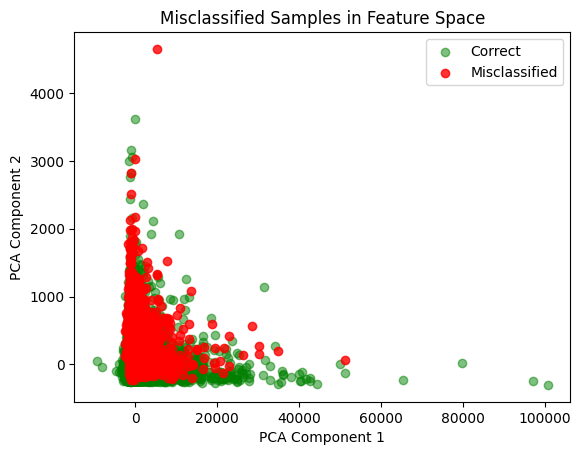

In [26]:
pca=PCA(n_components=2)
X_test_pca=pca.fit_transform(b)
correct_idx=pred_test==d
incorrect_idx=pred_test!=d
plt.scatter(X_test_pca[correct_idx, 0], X_test_pca[correct_idx, 1], color='green', label="Correct", alpha=0.5)
plt.scatter(X_test_pca[incorrect_idx, 0], X_test_pca[incorrect_idx, 1], color='red', label="Misclassified", alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Misclassified Samples in Feature Space")
plt.legend()
plt.show()

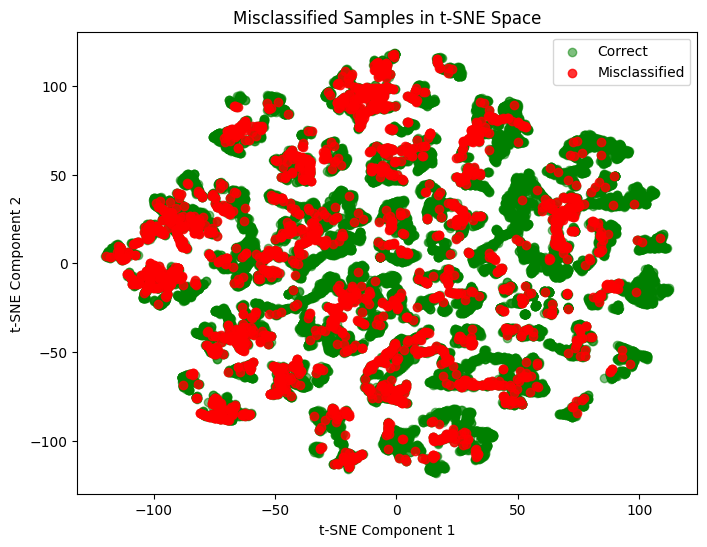

In [27]:
scaler=StandardScaler()
bt=scaler.fit_transform(b)
tsne=TSNE(n_components=2,perplexity=30,random_state=42)
X_test_tsne=tsne.fit_transform(bt)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_tsne[correct_idx,0],X_test_tsne[correct_idx,1],color='green',label="Correct",alpha=0.5)
plt.scatter(X_test_tsne[incorrect_idx,0],X_test_tsne[incorrect_idx,1],color='red', label="Misclassified",alpha=0.8)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Misclassified Samples in t-SNE Space")
plt.legend()
plt.show()

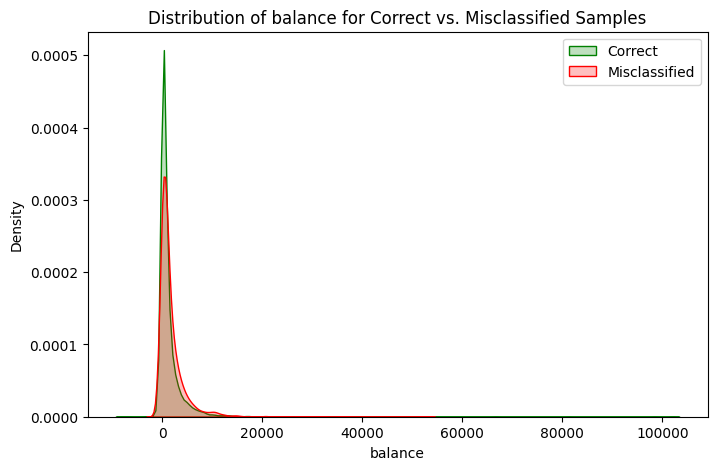

In [28]:
plt.figure(figsize=(8,5))  
sns.kdeplot(b[correct_idx]["balance"],label="Correct",shade=True,color="green")  
sns.kdeplot(b[incorrect_idx]["balance"],label="Misclassified",shade=True,color="red")
plt.xlabel("balance")  
plt.ylabel("Density")  
plt.title(f"Distribution of balance for Correct vs. Misclassified Samples")  
plt.legend()  
plt.show()

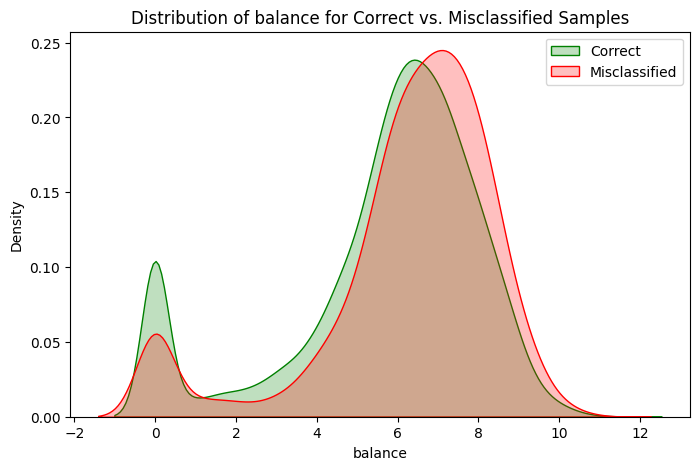

In [29]:
plt.figure(figsize=(8,5))  
sns.kdeplot(np.log1p(b[correct_idx]["balance"]),label="Correct",shade=True,color="green")  
sns.kdeplot(np.log1p(b[incorrect_idx]["balance"]),label="Misclassified",shade=True,color="red")
plt.xlabel("balance")  
plt.ylabel("Density")  
plt.title(f"Distribution of balance for Correct vs. Misclassified Samples")  
plt.legend()  
plt.show()

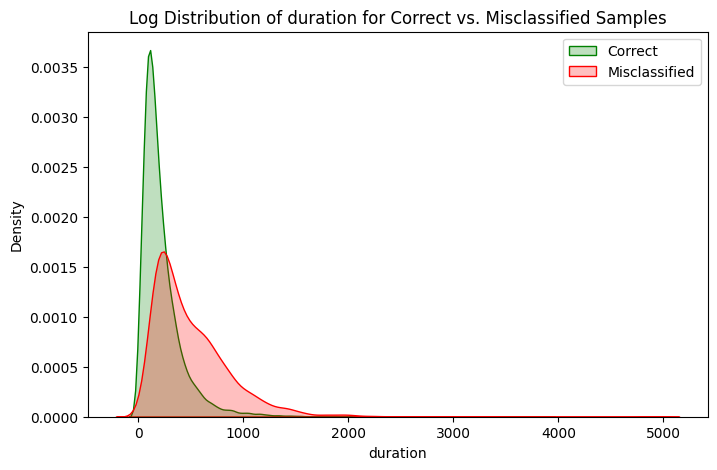

In [30]:
plt.figure(figsize=(8,5))  
sns.kdeplot(b[correct_idx]["duration"], label="Correct", shade=True, color="green")  
sns.kdeplot(b[incorrect_idx]["duration"], label="Misclassified", shade=True, color="red")  
plt.xlabel("duration")  
plt.ylabel("Density")  
plt.title(f"Log Distribution of duration for Correct vs. Misclassified Samples")  
plt.legend()  
plt.show()

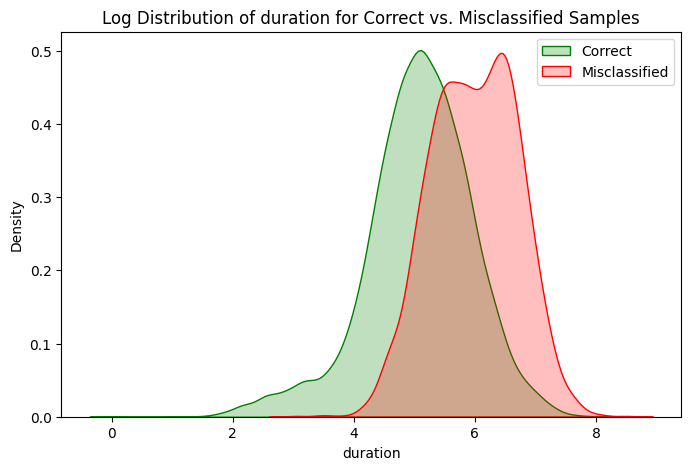

In [31]:
plt.figure(figsize=(8,5))  
sns.kdeplot(np.log1p(b[correct_idx]["duration"]), label="Correct", shade=True, color="green")  
sns.kdeplot(np.log1p(b[incorrect_idx]["duration"]), label="Misclassified", shade=True, color="red")  
plt.xlabel("duration")  
plt.ylabel("Density")  
plt.title(f"Log Distribution of duration for Correct vs. Misclassified Samples")  
plt.legend()  
plt.show()

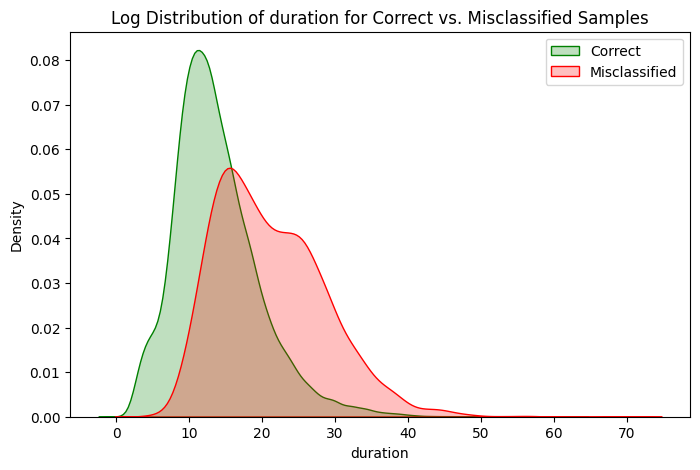

In [32]:
plt.figure(figsize=(8,5))  
sns.kdeplot(np.sqrt(b[correct_idx]["duration"]), label="Correct", shade=True, color="green")  
sns.kdeplot(np.sqrt(b[incorrect_idx]["duration"]), label="Misclassified", shade=True, color="red")  
plt.xlabel("duration")  
plt.ylabel("Density")  
plt.title(f"Log Distribution of duration for Correct vs. Misclassified Samples")  
plt.legend()  
plt.show()

In [33]:
#let's test if training model on low confidence will improve the situation or not

In [34]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
av,bv,cv,dv=train_test_split(a,c,train_size=0.5,random_state=1,stratify=c)
modelv=RandomForestClassifier()
modelv.fit(av,cv)
probsv=modelv.predict_proba(bv)
low_confidence = (probsv.max(axis=1)<=0.6)
hard_cases=bv[low_confidence]
rf_hard=RandomForestClassifier()
rf_hard.fit(hard_cases, dv[low_confidence])
final=modelv.predict_proba(b)
final_hard=(final.max(axis=1)<=0.6)
final_rf_hard=rf_hard.predict_proba(b[final_hard])
non_hard_y=d[~final_hard]
non_hard_probs_y=final[~final_hard][:,1]
hard_y=d[final_hard]
hard_probs_y=final_rf_hard[:,1]
fh=np.concatenate((non_hard_y,hard_y))
fhprobs=np.concatenate((non_hard_probs_y,hard_probs_y))
roc_auc_score(fh,fhprobs)

0.8429152784496838

In [35]:
final=modelv.predict(b)
final_rf_hard=rf_hard.predict(b[final_hard])
non_hard_y=d[~final_hard]
non_hard_probs_y=final[~final_hard]
hard_y=d[final_hard]
hard_probs_y=final_rf_hard
fh=np.concatenate((non_hard_y,hard_y))
fhprobs=np.concatenate((non_hard_probs_y,hard_probs_y))
f1_score(fh,fhprobs),f1_score(hard_y,hard_probs_y)

(0.39274546591619763, 0.5086705202312138)

In [36]:
#as expected its high confidence lead to failure of this, it can improve in low confidence areas

In [37]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
av,bv,cv,dv=train_test_split(a,c,train_size=0.5,random_state=1,stratify=c)
modelv=RandomForestClassifier()
modelv.fit(av,cv)
probsv=modelv.predict_proba(bv)
low_confidence = (probsv.max(axis=1)>=0.6)
hard_cases=bv[low_confidence]
rf_hard=RandomForestClassifier()
rf_hard.fit(hard_cases, dv[low_confidence])
final=modelv.predict_proba(b)
final_hard=(final.max(axis=1)>=0.6)
final_rf_hard=rf_hard.predict_proba(b[final_hard])
non_hard_y=d[~final_hard]
non_hard_probs_y=final[~final_hard][:,1]
hard_y=d[final_hard]
hard_probs_y=final_rf_hard[:,1]
fh=np.concatenate((non_hard_y,hard_y))
fhprobs=np.concatenate((non_hard_probs_y,hard_probs_y))
roc_auc_score(fh,fhprobs)

0.8449304166605706

In [38]:
final=modelv.predict(b)
final_rf_hard=rf_hard.predict(b[final_hard])
non_hard_y=d[~final_hard]
non_hard_probs_y=final[~final_hard]
hard_y=d[final_hard]
hard_probs_y=final_rf_hard
fh=np.concatenate((non_hard_y,hard_y))
fhprobs=np.concatenate((non_hard_probs_y,hard_probs_y))
f1_score(fh,fhprobs),f1_score(hard_y,hard_probs_y)

(0.3542300669506999, 0.3220779220779221)

In [39]:
# So we are stuck, in low confidence areas main model can be improved but imporvement can't be relied on
# if another model is trained on high confidence then its results in decrease though not much
# the main problem apart from this is that classification and misclassification overlap, 
# top features missclassification and classification kde are same, seperating those with common transform is failed, so we are stuck 